<a href="https://colab.research.google.com/github/kanangupta4412/The_Sparks_Foundation/blob/main/PredictionUsingSupervisedML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#TASK : Prediction Using Supervised ML


#AUTHOR : Kanan Gupta


###GRIP @TheSparksFoundation

### **Importing the necessary libraries**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
print("Libraries are imported")

Libraries are imported


### **Reading the data**

In [18]:
url = "http://bit.ly/w-data"
data = pd.read_csv(url)

data.head(12)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


###**Finding insights from the data**

In [3]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


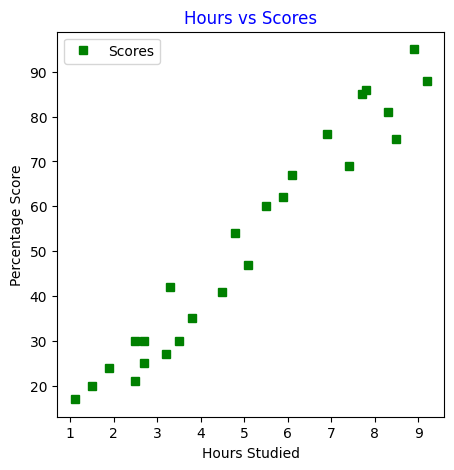

In [5]:
data.plot(x='Hours', y='Scores', style='s',color="green", figsize=(5,5))
plt.title('Hours vs Scores',color = "Blue")
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

### **Preparing the data**

In [6]:
x = data.iloc[:, 0].values
y = data.iloc[:, 1].values
#or
#x=data['Hours'].values
#y=data['Scores'].values
#print("Splitting is done")

In [7]:
x

array([2.5, 5.1, 3.2, 8.5, 3.5, 1.5, 9.2, 5.5, 8.3, 2.7, 7.7, 5.9, 4.5,
       3.3, 1.1, 8.9, 2.5, 1.9, 6.1, 7.4, 2.7, 4.8, 3.8, 6.9, 7.8])

In [8]:
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86])

### **Splitting the data into test and training datasets**

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state=12)

In [10]:
len(x_train), len(y_train), len(x_test), len(y_test)

(17, 17, 8, 8)

###**Training the Model**

In [11]:
from sklearn.linear_model import LinearRegression
lrg = LinearRegression()
lrg.fit(x_train.reshape(-1, 1), y_train)
print("Training is done successfully")

Training is done successfully


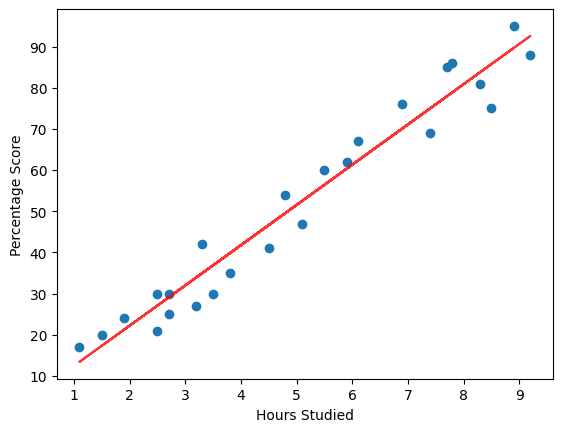

In [12]:
rline = lrg.coef_*x + lrg.intercept_ #plotting the regression line

# Plotting for the test data

plt.scatter(x, y)
plt.plot(x, rline, color='red', alpha=0.8)
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()


###**Making Predictions**

In [13]:
y_pred = lrg.predict(x_test.reshape(-1, 1))
y_pred

array([74.97365707, 56.40147769, 62.26637644, 52.49154519, 89.63590396,
       83.7710052 , 36.85181518, 13.39222016])

In [14]:
#Comparing both actual and predicted values

avp = pd.DataFrame({'Actual scores': y_test, 'Predicted scores': y_pred})
avp

,Actual scores,Predicted scores
0,69,74.973657
1,60,56.401478
2,67,62.266376
3,47,52.491545
4,95,89.635904
5,81,83.771005
6,30,36.851815
7,17,13.392220


In [15]:
#testing with our own data

hrs = 9.25
o_pred = lrg.predict([[hrs]])
print("Predicted score if a student studies for",hrs ,"hours per day is",float(o_pred[0]),"%")

Predicted score if a student studies for 9.25 hours per day is 93.057094895472 %


###**Evaluating the model**

In [16]:
#through accuracy

lrg.score(x_test.reshape(-1, 1), y_test)

0.9578604019720701

In [17]:
#through error

from sklearn import metrics
print('Mean Absolute Error:',
      metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 4.7990055486547325
